In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb


# Reading the data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
data.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
data.shape

(32560, 15)

In [5]:
data['target']=data['Income'].apply(lambda x:1 if x==' >50K' else 0)

In [6]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# Plot showing target distribution across Education and Gender

<AxesSubplot:xlabel='Sex'>

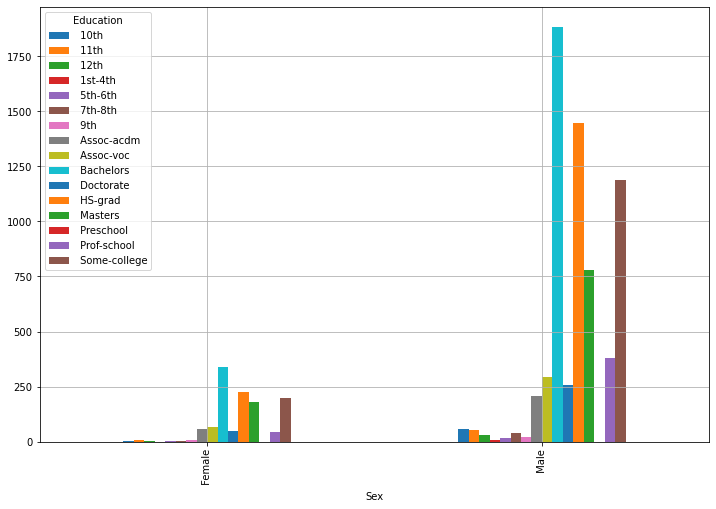

In [8]:
data.groupby(['Education','Sex'])['target'].sum().unstack('Education').plot(kind='bar',grid=True,figsize=(12,8))

In [9]:
d1=data.groupby(['Race','Sex'])['target'].sum().reset_index()

In [10]:
t=pd.pivot_table(d1,index='Race',columns='Sex',values='target')

# Plot showing target distribution across Race and Gender

C:\Users\Reshmi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


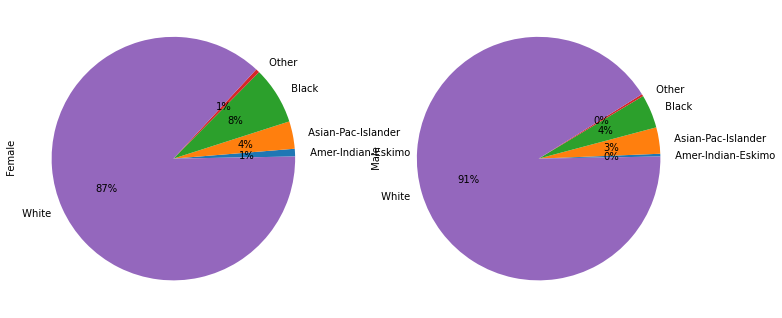

In [11]:
fig,ax=plt.subplots(figsize=(12,8))
t.plot(kind='pie',subplots=True,ax=ax,legend=False,autopct='%1.0f%%',startangle=True)
plt.xticks(rotation=45)
plt.show()


# Plot showing target distribution across Workclass and MaritalStatus

<AxesSubplot:xlabel='Workclass'>

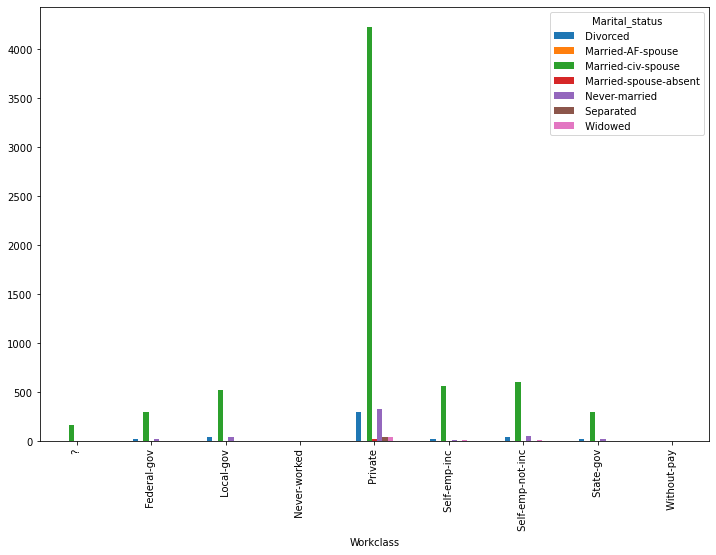

In [12]:
data.groupby(['Workclass','Marital_status'])['target'].sum().unstack('Marital_status').plot(kind='bar',figsize=(12,8))

# Plot showing target distribution across workclass and occupation

<AxesSubplot:xlabel='Workclass'>

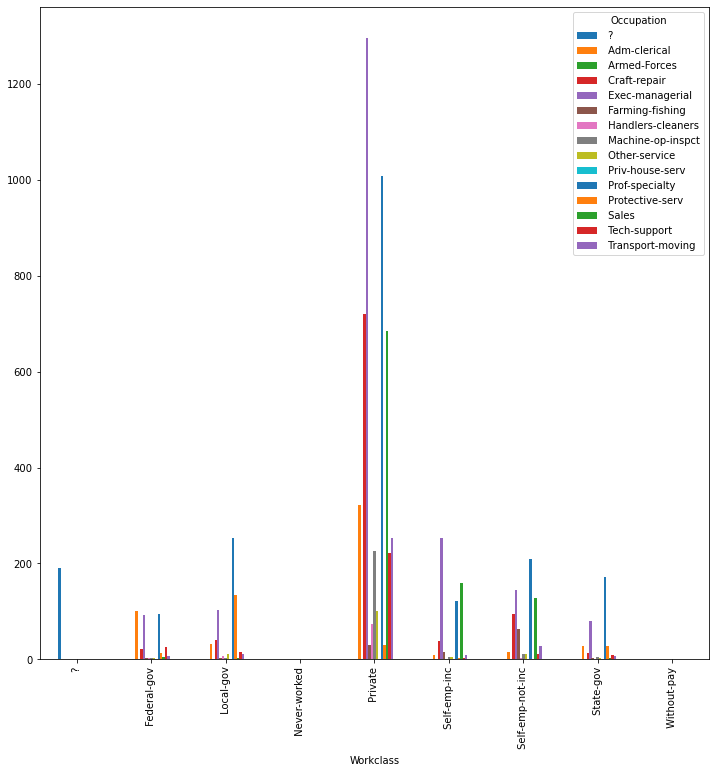

In [13]:
data.groupby(['Occupation','Workclass'])['target'].sum().unstack('Occupation').plot(kind='bar',figsize=(12,12))

In [14]:
data.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  target  
0             0             0              13   United-States   <=50K       0  
1             0             0              40   United-States   <=50K       0  
2             0             0              40   United-States   <=50K       0  
3             0             0              40            Cuba   <=50K       0  
4             0             0              40   United-States   <=50K       0

In [15]:
data.drop(columns=['Fnlwgt','Income'],inplace=True)

In [16]:
 data.head()

Age          Workclass   Education  Education_num       Marital_status  \
0   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
1   38            Private     HS-grad              9             Divorced   
2   53            Private        11th              7   Married-civ-spouse   
3   28            Private   Bachelors             13   Married-civ-spouse   
4   37            Private     Masters             14   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   Capital_loss  Hours_per_week  Native_country  target  
0             0              13   United-States       0  
1             0              40   United-States       0  
2             0              40   United-States       0  
3             0              40            Cuba       0  
4             0              40   United-States       0

In [17]:
x=data.drop(columns=['target'])
y=data['target']

In [18]:
cat_feat=[i for i in x.columns if x[i].dtype=='O']
cont_feat=[i for i in x.columns if x[i].dtype!='O']

In [19]:
cat_feat_with_miss=[i for i in cat_feat if x[i].isnull().sum()>0]
cont_feat_with_miss=[i for i in cont_feat if x[i].isnull().sum()>0]

# LabelEncoding the Caegorical Variables

In [20]:
for i in cat_feat:
    lb=LabelEncoder()
    x[i]=lb.fit_transform(x[i])

In [21]:
x[cat_feat]

Workclass  Education  Marital_status  Occupation  Relationship  Race  \
0              6          9               2           4             0     4   
1              4         11               0           6             1     4   
2              4          1               2           6             0     2   
3              4          9               2          10             5     2   
4              4         12               2           4             5     4   
...          ...        ...             ...         ...           ...   ...   
32555          4          7               2          13             5     4   
32556          4         11               2           7             0     4   
32557          4         11               6           1             4     4   
32558          4         11               4           1             3     4   
32559          5         11               2           4             5     4   

       Sex  Native_country  
0        1              39  
1        1              39  
2        1              39  
3        0               5  
4        0              39  
...    ...             ...  
32555    0              39  
32556    1              39  
32557    0              39  
32558    1              39  
32559    0              39  

[32560 rows x 8 columns]

In [22]:
x

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
3       28          4          9             13               2          10   
4       37          4         12             14               2           4   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0                 0     4    1             0             0              13   
1                 1     4    1             0             0              40   
2                 0     2    1             0             0              40   
3                 5     2    0             0             0              40   
4                 5     4    0             0             0              40   
...             ...   ...  ...           ...           ...             ...   
32555             5     4    0             0             0              38   
32556             0     4    1             0             0              40   
32557             4     4    0             0             0              40   
32558             3     4    1             0             0              20   
32559             5     4    0         15024             0              40   

       Native_country  
0                  39  
1                  39  
2                  39  
3                   5  
4                  39  
...               ...  
32555              39  
32556              39  
32557              39  
32558              39  
32559              39  

[32560 rows x 13 columns]

In [23]:
scaler=StandardScaler()

In [24]:
x=scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [26]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    return score

# Different Models

In [27]:
lg_score=Prediction(LogisticRegression(),x_train,x_test,y_train,y_test)
rf_score=Prediction(RandomForestClassifier(),x_train,x_test,y_train,y_test)
gb_score=Prediction(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)
xg_score=Prediction(xgb.XGBClassifier(),x_train,x_test,y_train,y_test)

C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
results=pd.DataFrame({'Models':['LogisticRegression','Randomforest','Gradientforest','XGBOOST'],'Accuracy':[lg_score,rf_score,gb_score,xg_score]})

# Final Result

In [29]:
results

Models  Accuracy
0  LogisticRegression  0.826679
1        Randomforest  0.855242
2      Gradientforest  0.868346
3             XGBOOST  0.875717